In [30]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from keras.layers import Dense
import pickle
import json
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/TugasJST/MLP/Regresi/data.csv') # Importing the dataset
df.sample(5) #previewing dataset randomly

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6424,Acura,Legend,1995.0,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,22.0,17.0,204.0,2356.0
2378,"Porsche,Cayenne,2016,diesel,240,6,AUTOMATIC,al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11299,Hyundai,Veracruz,2011.0,regular unleaded,260.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,22.0,17.0,1439.0,28345.0
8265,"Land Rover,Range Rover Evoque,2017,premium unl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6529,Buick,Lucerne,2009.0,flex-fuel (unleaded/E85),227.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Large,Sedan,26.0,17.0,155.0,35770.0


In [32]:
print(df.shape) # view the dataset shape
print(df['Make'].value_counts()) # viewing Car companies with their cars number

(11914, 16)
Chevrolet                                                                                                                                                         998
Ford                                                                                                                                                              763
Toyota                                                                                                                                                            678
Volkswagen                                                                                                                                                        580
Dodge                                                                                                                                                             541
                                                                                                                                                              

In [33]:
new_df = df[df['Make']=='Volkswagen'] # in this new dataset we only take 'Volkswagen' Cars
print(new_df.shape) # Viewing the new dataset shape
print(new_df.isnull().sum()) # Is there any Null or Empty cell presents
new_df = new_df.dropna() # Deleting the rows which have Empty cells
print(new_df.shape) # After deletion Vewing the shape
print(new_df.isnull().sum()) #Is there any Null or Empty cell presents
new_df.sample(2) # Checking the random dataset sample

(580, 16)
Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64
(352, 16)
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1837,Volkswagen,Beetle Convertible,2015.0,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Performance,Compact,Convertible,29.0,23.0,873.0,32595.0
1952,Volkswagen,Beetle,2017.0,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,33.0,24.0,873.0,21890.0


In [34]:
new_df = new_df[['Engine HP','MSRP']] # We only take the 'Engine HP' and 'MSRP' columns
new_df.sample(5) # Checking the random dataset sample

,Engine HP,MSRP
2399,200.0,35375.0
8002,170.0,16675.0
10418,200.0,28700.0
1903,170.0,25095.0
5346,200.0,23745.0


In [35]:
X = np.array(new_df[['Engine HP']]) # Storing into X the 'Engine HP' as np.array
y = np.array(new_df[['MSRP']]) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(352, 1)
(352, 1)


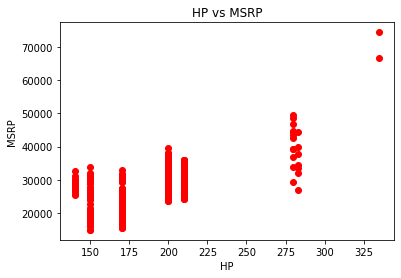

In [36]:
plt.scatter(X,y,color="red") # Plot a graph X vs y
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fiting the dataset into the model
filename = 'predictcarvalue.h5'
pickle.dump(regressor, open(filename, 'wb'))

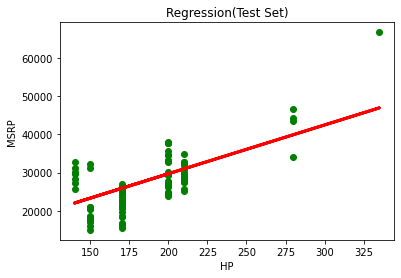

In [38]:
plt.scatter(X_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

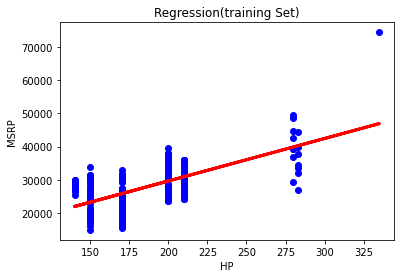

In [39]:
plt.scatter(X_train,y_train,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [40]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Priniting the mean error

R2 score: 0.51
Mean squared Error : 29222988.406013012


In [41]:
def car_price(hp): # A function to predict the price according to Horsepower
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Price will be : ',int(car_price(car_hp))*69,'₹')

Enter Volkswagen cars Horse Power : 200
This Volkswagen Price will be :  2048817 ₹
